In [3]:
import numpy as np
import pandas as pd
from paths import *
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
# Reading in pools
uni_pools = pd.read_csv("rawPools_V3.csv")
uni_pools.rename(columns={"id":"contractAddress"}, inplace=True)
uni_creators = pd.read_csv("pool_creators.csv")
uni_pools = uni_pools.merge(uni_creators, on="contractAddress")

sushi_pools = pd.read_csv("sushi_pairs.csv")
sushi_pools.rename(columns={"id": "contractAddress"}, inplace=True)
sushi_creators = pd.read_csv("sushi_pool_creators.csv")
sushi_pools = sushi_pools.merge(sushi_creators, on="contractAddress")


In [4]:
# Reading in the Position Changes
sushi_liquidity = pd.read_csv("sushi_liquidity_positions.csv")



uni_positions = pd.read_csv("rawPositions_V3.csv")

# So this has the liquidity in each pool at daily? timestamps
# doesn't have it by user


In [5]:
sushi_liquidity["block"].nunique()

181295

In [6]:
sushi_liquidity.drop_duplicates(inplace=True)


pair_init = sushi_liquidity.loc[:, ["pair.id", "block", "timestamp"]]
pair_init = pair_init.sort_values("block").drop_duplicates(subset=["pair.id"])
pair_init.columns = ["contractAddress", "init_block", "init_time"]

In [7]:
pair_init.head(20)

,contractAddress,init_block,init_time
0,0x58dc5a51fe44589beb22e8ce67720b5bc5378009,10828542,1599668526
37,0x95b54c8da12bb23f7a5f6e26c38d04acc6f81820,10829114,1599675522
51,0x611cde65dea90918c0078ac0400a72b0d25b9bb1,10829214,1599676827
53,0x117d4288b3635021a3d612fe05a3cbf5c717fef2,10829235,1599677095
57,0x001b6450083e531a5a7bf310bd2c1af4247e23d4,10829243,1599677178
62,0x31503dcb60119a812fee820bb7042752019f2355,10829250,1599677294
66,0xa75f7c2f025f470355515482bde9efa8153536a8,10829262,1599677431
71,0xa1d7b2d891e3a1f9ef4bbc5be20630c2feb1c470,10829272,1599677574
76,0x5e63360e891bd60c69445970256c260b0a6a54c6,10829280,1599677738
83,0xf1f85b2c54a2bd284b1cf4141d64fd171bd85539,10829294,1599677885


In [94]:
sushi_pools.shape

(3592, 15)

In [95]:
sushi_pools = sushi_pools.merge(pair_init, on="contractAddress")

In [15]:
file = open('temporal_liquidity_graphs.pkl', 'wb')


In [16]:
# Need to create the sequence of graphs G = [g1,g2,g3,...]
# at each block step

# We will have 181295 graphs...sigh, this is going to take a lot of space
import pickle
blocks = list(sushi_liquidity["block"].drop_duplicates())
Graphs = []

def get_sushi_graph(block_num):
    liq_pos = sushi_liquidity[sushi_liquidity["block"] <= block_step]
    G = nx.from_pandas_edgelist(liq_pos, "user.id", "pair.id",
                                edge_attr="liquidityTokenBalance", create_using=nx.MultiDiGraph)
    
    return G

get_sushi_graph
    

: 

: 

In [ ]:
len(Graphs)

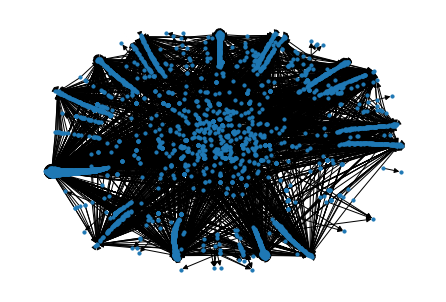

In [14]:
nx.draw(Graphs[3099], pos=nx.spring_layout(Graphs[3099]), node_size=10)
plt.show()

In [107]:
blocks[1130]

10830609

In [ ]:
sushi_pools[sushi_pools["init_block"] == 10828564]


,name,contractAddress,token0.id,token0.symbol,token0.name,token0.decimals,token1.id,token1.symbol,token1.name,token1.decimals,totalSupply,volumeUSD,txCount,contractCreator,txHash,init_block,init_time


In [ ]:
liq_pos = sushi_liquidity[sushi_liquidity["block"] == 10828564]
for row in liq_pos.iterrows():
    G_prev.add_edge(row[1]["user.id"], row[1]["pair.id"], attr=row[1]["liquidityTokenBalance"])

0x89ae8855743256a93a82aad56aab4a23fbf14242 0x58dc5a51fe44589beb22e8ce67720b5bc5378009 0.0


In [13]:
l = sushi_liquidity["pair.name"].drop_duplicates().values
l[70:100]

array(['CAFE-WETH', 'ZAG-WETH', 'WHIVE-WETH', 'PERX-WETH', 'WETH-JRE',
       'HEGIC-WETH', 'YFL-WETH', 'HGET-USDT', 'DAI-Dap', 'BUSD-WETH',
       'RBT-WETH', 'BOBA-WETH', 'WETH-RARI', 'MoonGain-WETH', 'WETH-BOBA',
       'WETH-ZEON', 'gSushi-SUSHI', 'MSI-WETH', 'BERRY-WETH',
       'ROOBEE-WETH', 'SUSHI-TOAST', 'BTSE-WETH', '1913-USDT',
       '  比特币  -WETH', 'UBXT-WETH', 'YFMEAT-WETH', 'WETH-PYLON',
       'Yf3L-WETH', 'YFII-WETH', 'HGET-WETH'], dtype=object)

In [14]:
sushi_liquidity

,id,user.id,liquidityTokenBalance,pair.id,pair.name,pair.token0.id,pair.token0.name,pair.token1.id,pair.token1.name,block,timestamp
0,0x58dc5a51fe44589beb22e8ce67720b5bc5378009-0x8...,0x88e6c88d262b7c6d90a29ff11862e4003f1a2e46,0.000000,0x58dc5a51fe44589beb22e8ce67720b5bc5378009,WETH-CRV,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,Wrapped Ether,0xd533a949740bb3306d119cc777fa900ba034cd52,Curve DAO Token,10828542,1599668526
1,0x58dc5a51fe44589beb22e8ce67720b5bc5378009-0x9...,0x9235fd6839b0d8b2fae8c7008365382da79314e6,0.000000,0x58dc5a51fe44589beb22e8ce67720b5bc5378009,WETH-CRV,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,Wrapped Ether,0xd533a949740bb3306d119cc777fa900ba034cd52,Curve DAO Token,10828542,1599668526
2,0x58dc5a51fe44589beb22e8ce67720b5bc5378009-0xc...,0xc16414ac1fedfdac4f8a09674d994e1bbb9d7113,0.000000,0x58dc5a51fe44589beb22e8ce67720b5bc5378009,WETH-CRV,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,Wrapped Ether,0xd533a949740bb3306d119cc777fa900ba034cd52,Curve DAO Token,10828561,1599668820
3,0x58dc5a51fe44589beb22e8ce67720b5bc5378009-0x8...,0x89ae8855743256a93a82aad56aab4a23fbf14242,0.000000,0x58dc5a51fe44589beb22e8ce67720b5bc5378009,WETH-CRV,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,Wrapped Ether,0xd533a949740bb3306d119cc777fa900ba034cd52,Curve DAO Token,10828564,1599668851
4,0x58dc5a51fe44589beb22e8ce67720b5bc5378009-0x8...,0x85c5489f74fe5000ff0701535d9ec8ef49dfe704,0.000000,0x58dc5a51fe44589beb22e8ce67720b5bc5378009,WETH-CRV,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,Wrapped Ether,0xd533a949740bb3306d119cc777fa900ba034cd52,Curve DAO Token,10828601,1599669256
...,...,...,...,...,...,...,...,...,...,...,...
199054,0xc3f279090a47e80990fe3a9c30d24cb117ef91a8-0x7...,0x74416b049041de5b126daf12a72b955df79611ae,0.009540,0xc3f279090a47e80990fe3a9c30d24cb117ef91a8,WETH-ALCX,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,Wrapped Ether,0xdbdb4d16eda451d0503b854cf79d55697f90c8df,Alchemix,16869282,1679320103
199055,0x0eee7f7319013df1f24f5eaf83004fcf9cf49245-0x7...,0x74416b049041de5b126daf12a72b955df79611ae,1.630176,0x0eee7f7319013df1f24f5eaf83004fcf9cf49245,BAO-WETH,0x374cb8c27130e2c9e04f44303f3c8351b9de61c1,BaoToken,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,Wrapped Ether,16869309,1679320427
199056,0x0225e940deecc32a8d7c003cfb7dae22af18460c-0x7...,0x74416b049041de5b126daf12a72b955df79611ae,0.000130,0x0225e940deecc32a8d7c003cfb7dae22af18460c,COOL-WETH,0x114f1388fab456c4ba31b1850b244eedcd024136,Cool Cats,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,Wrapped Ether,16869330,1679320679
199057,0x82ebcd936c9e938704b65027850e42393f8bc4d4-0x7...,0x7473609cbba9c29f88ccc871b5649a7504003d28,0.000000,0x82ebcd936c9e938704b65027850e42393f8bc4d4,NAOS-WETH,0x4a615bb7166210cce20e6642a6f8fb5d4d044496,NAOSToken,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,Wrapped Ether,16869417,1679321735
